In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

The final test score I'm using is RMSE = 1.389591.

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import os
import sys

import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas as pd
from sklearn.dummy import DummyRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (KBinsDiscretizer, StandardScaler, MinMaxScaler,
FunctionTransformer, RobustScaler, QuantileTransformer, PowerTransformer,
OrdinalEncoder, OneHotEncoder)
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from lightgbm.sklearn import LGBMRegressor
from sklearn.feature_selection import RFECV
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import shap
import seaborn as sns

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

I'm going to analyzing the AirB&B dataset. Identifying the features that contribute to the target value could be a major benefit to Airbnb hosts who want to boost the visiblity of their properties. Identifying what could contribute to more (hopefully positive) reviews would be very valuable for people trying to gain standing in a competitive Airbnb scene like NYC. This dataset seems to have a lot of information in different forms so it's going to be important to organize it properly before putting it into a model.

In [3]:
abnb_df = pd.read_csv("data/AB_NYC_2019.csv")
abnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In the following section, I drop rows that have a target value of NaN. I think it would be a waste to include impute them because I would be assuming a target value based on very little actual data, which could interfere with the model. Otherwise I split the data evenly and extract the target feature into X_train, y_train, X_test, and y_test. I produce X_train and y_train to get a glance of the data and assure they have the same shape.

In [4]:
target = "reviews_per_month"
drop_df = abnb_df.dropna(subset=target)
# dropped rows with no target value

In [5]:
X = drop_df.drop(columns=target)
y = drop_df["reviews_per_month"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=123)

In [6]:
X_train

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
14989,11937647,Entire Williamsburg apt.,12446288,Micki & Kristian,Brooklyn,Williamsburg,40.71541,-73.93748,Entire home/apt,110,3,4,2018-05-30,1,0
40517,31409612,Tremendous Views - Greenpoint,56061729,Dennis,Brooklyn,Greenpoint,40.73421,-73.95318,Entire home/apt,125,2,8,2019-06-10,1,188
32631,25635216,Clean and Nice Central Park Apt in Lincoln Center,193127179,Sagawa,Manhattan,Upper West Side,40.77640,-73.98236,Private room,85,4,18,2019-05-03,1,133
39464,30747515,Bedstuy-stay,20043437,Marianne,Brooklyn,Bedford-Stuyvesant,40.68581,-73.95189,Private room,35,10,3,2019-05-31,1,5
26165,20864878,High Line Sun Drenched Home,13462349,Elvis,Manhattan,Chelsea,40.74690,-73.99494,Entire home/apt,200,2,40,2019-06-19,1,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,6784378,Large Room & Own Bath by train,7788268,Marites,Brooklyn,Prospect-Lefferts Gardens,40.65894,-73.95947,Private room,75,2,10,2018-05-07,1,52
18555,14646562,Velvet Retreat in the West Village,22218694,Lea,Manhattan,West Village,40.73455,-74.00600,Entire home/apt,180,2,100,2019-07-01,2,344
21326,16976026,Cheap Family home with desk 10 mn to JFK+Mall,107455767,Guelma,Queens,Rosedale,40.65292,-73.73652,Private room,45,14,70,2019-06-24,5,281
33469,26455093,Presidential Comfort,198476726,Cathy,Queens,Far Rockaway,40.60395,-73.74904,Private room,55,1,27,2019-07-07,1,177


In [7]:
y_train

14989    0.10
40517    1.37
32631    1.38
39464    0.48
26165    1.81
         ... 
8846     0.22
18555    2.90
21326    2.38
33469    2.21
18940    3.93
Name: reviews_per_month, Length: 27190, dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

Overall there are a few things I noticed about the data. Firstly there are serious outliers in several of the numerical features ("price", "minimum_nights", and "calculated_host_listings" have a few values which drastically expand the range of the feature). Outliers have a strong effect on linear models, but also make standard scaling less effective. As such I'll try to implement a logistic scaler instead on these features. 

"Price", and "minimum nights" seem to have some significant predictive value, however unexpectedly, "365 availability" doesn't seem to have a large affect on reviews per month just looking at the plot. "Number of reviews" seems to have good predictive value, but "cheats" in that it has too close a connection to the target value. AirB&B's with a high number of reviews per month will also objectively have a large total number of reviews. 

The reviews per month target however could be a problem depending on how it is derived. Many AirB&Bs have months of inactivity, and if those 0 review months are bringing down the overall score, that could cause a major bias in the data. "Id", and "host_id" seems like entirely redundant features and I'm planning on ignoring them. "Host name" could be a useful feature, but it seems difficult to interpret. Do we bin according to culture? How are we going to extract the occasional full name or Jane&Joe ampersand combo including in the data. For the moment I might just drop it. 

Latitude and longitude seem to have some predictive value, but do not look like they have a linear connection with the target value so it would be a good idea to make them categorical features by binning them. They may also be redundant with the "nieghborhood_group" feature but colinearty isn't always a drawback so we'll be including all three. I was initially planning on dropping "neighborhood" in favor of "neighborhood_group" but upon inspecting the latitude/longitude scatter plot, it seems that a block does make all the difference. 

In addition to this, it doesn't seem like any column needs an imputer, but we might as well pass one in just in case.

In [8]:
drop_df.describe()

#This preliminary summary lets us know the scale of each of the numeric columns and if you need to use a imputer for any of them.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.884300e+04,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888
std,1.069370e+07,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720027e+06,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755482e+07,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [9]:
drop_df["neighbourhood"].value_counts()


neighbourhood
Williamsburg          3163
Bedford-Stuyvesant    3141
Harlem                2206
Bushwick              1944
Hell's Kitchen        1532
                      ... 
Eltingville              2
New Dorp Beach           2
Richmondtown             1
Rossville                1
Willowbrook              1
Name: count, Length: 218, dtype: int64

In [10]:
drop_df["neighbourhood_group"].value_counts()

# This gives us an idea of the spread of the data, since we want to keep the linear model interpretable I want to use this feature instead of the more specific "neighbourhoods" to avoid a massive one_hot_encoding feature expansion.

neighbourhood_group
Manhattan        16632
Brooklyn         16447
Queens            4574
Bronx              876
Staten Island      314
Name: count, dtype: int64

In [11]:
drop_df["room_type"].value_counts()

room_type
Entire home/apt    20332
Private room       17665
Shared room          846
Name: count, dtype: int64

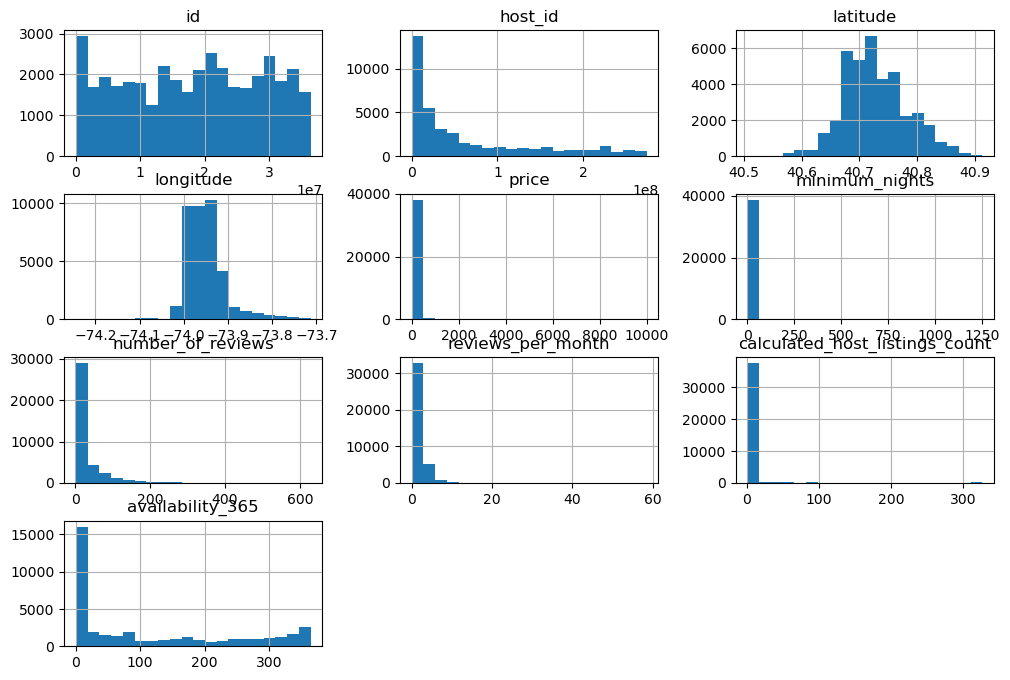

In [12]:
drop_df.hist(bins=20, figsize=(12, 8));

#These histograms show the presence of serious outliers in several of the numerical features ("price", "minimum_nights", and "calculated_host_listings"). Outliers have a strong effect on linear models, but also make standard scaling less effective. As such I'll try to implement a logistic scaler instead on these features.

In [13]:
drop_df['room_type'].unique()

# This could be ordinal.

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<Axes: xlabel='price', ylabel='reviews_per_month'>

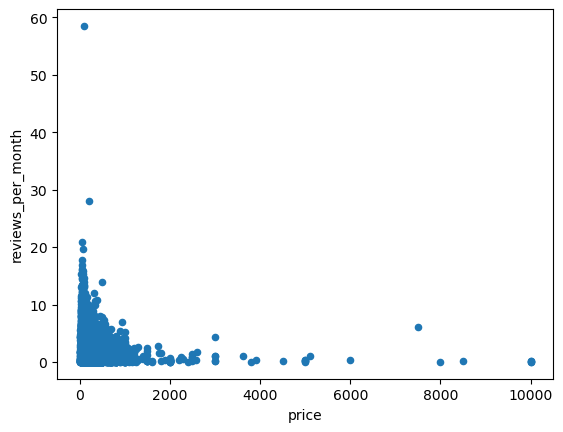

In [14]:
drop_df.plot(x="price", y="reviews_per_month", kind="scatter")

<Axes: xlabel='availability_365', ylabel='reviews_per_month'>

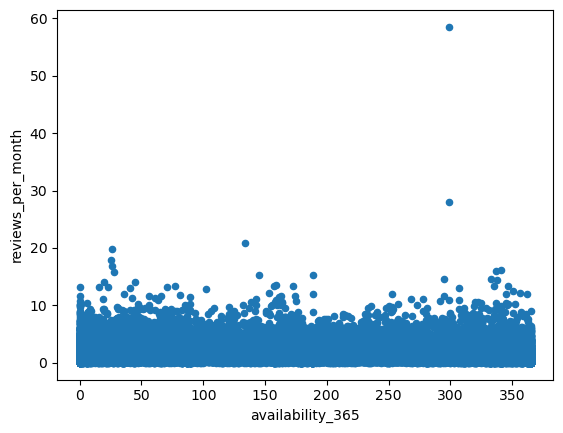

In [15]:
drop_df.plot(x="availability_365", y="reviews_per_month", kind="scatter")

<Axes: xlabel='minimum_nights', ylabel='reviews_per_month'>

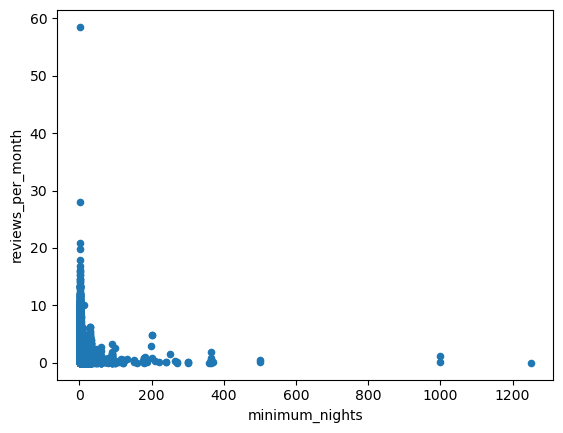

In [16]:
drop_df.plot(x="minimum_nights", y="reviews_per_month", kind="scatter")

<Axes: xlabel='calculated_host_listings_count', ylabel='reviews_per_month'>

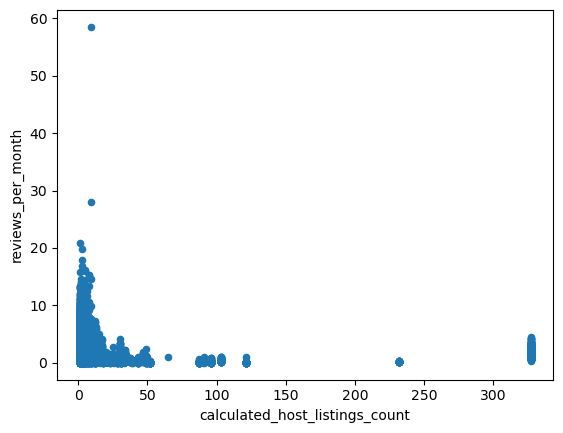

In [17]:
drop_df.plot(x="calculated_host_listings_count", y="reviews_per_month", kind="scatter")

<Axes: xlabel='room_type', ylabel='reviews_per_month'>

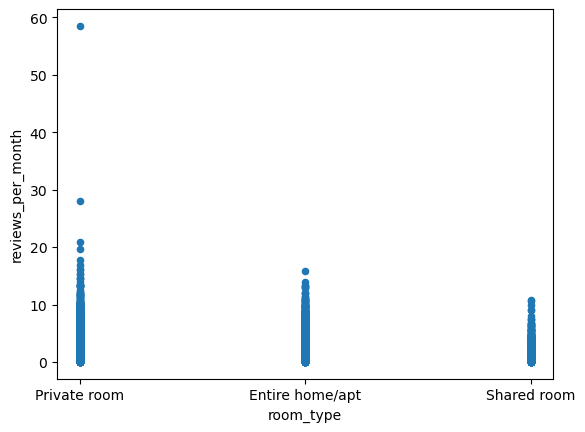

In [18]:
drop_df.plot(x="room_type", y="reviews_per_month", kind="scatter")
#Here you can see that room_type is ordinally related

<Axes: xlabel='number_of_reviews', ylabel='reviews_per_month'>

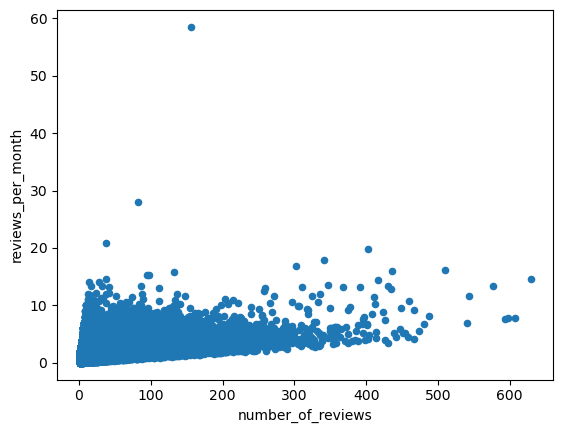

In [19]:
drop_df.plot(x="number_of_reviews", y="reviews_per_month", kind="scatter")

# While this looks promising, number of reviews is definitely a source of data leakage on the reviews per month feature and will have to be dropped from the data set.

<Axes: xlabel='neighbourhood_group', ylabel='reviews_per_month'>

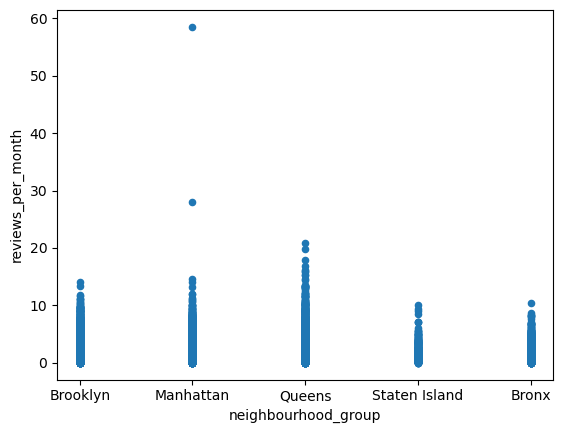

In [20]:
drop_df.plot(x="neighbourhood_group", y="reviews_per_month", kind="scatter")

<Axes: xlabel='neighbourhood', ylabel='reviews_per_month'>

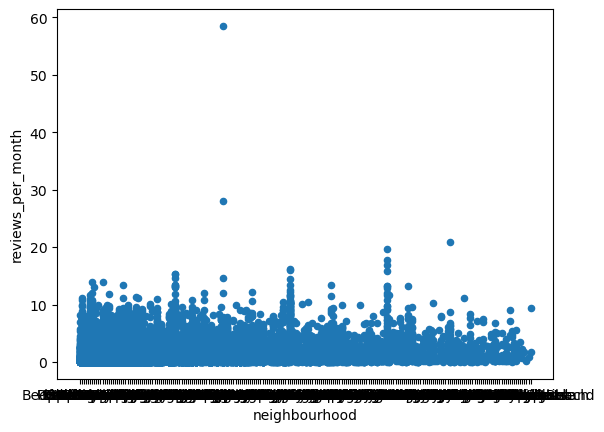

In [21]:
drop_df.plot(x="neighbourhood", y="reviews_per_month", kind="scatter")

/var/folders/y2/p5_k0x8s14s50xtftv8n3l440000gn/T/ipykernel_45603/1371627292.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df['scaled_reviews_per_month'] = drop_df['reviews_per_month'].apply(log_transform)


Text(0, 0.5, 'latitude')

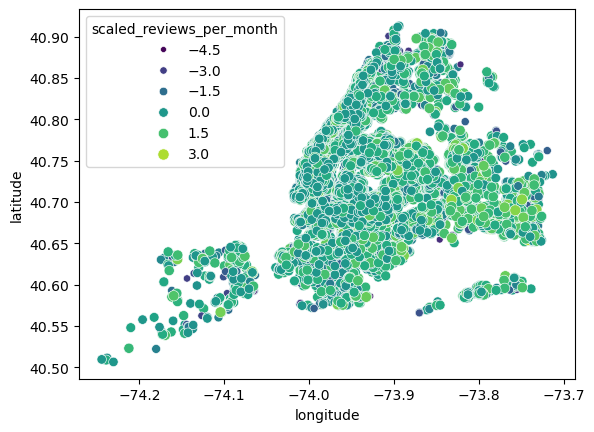

In [22]:
#drop_df['scaled_reviews_per_month'] = QuantileTransformer(
#            output_distribution="uniform", random_state=42
#        ).fit_transform(drop_df[['reviews_per_month']])

def log_transform(X):
    return np.where(X > 0, np.log(X), 0)

#drop_df['scaled_reviews_per_month'] = PowerTransformer(method="box-cox").fit_transform(drop_df[['reviews_per_month']])

drop_df['scaled_reviews_per_month'] = drop_df['reviews_per_month'].apply(log_transform)

lat_long_plot = sns.scatterplot(y = drop_df['latitude'], 
                                x = drop_df['longitude'],  
                                data = drop_df,  
                                size = drop_df['scaled_reviews_per_month'],  
                                hue = drop_df['scaled_reviews_per_month'],  
                                palette = 'viridis') 
lat_long_plot.set_xlabel('longitude') 
lat_long_plot.set_ylabel('latitude')

Text(0, 0.5, 'latitude')

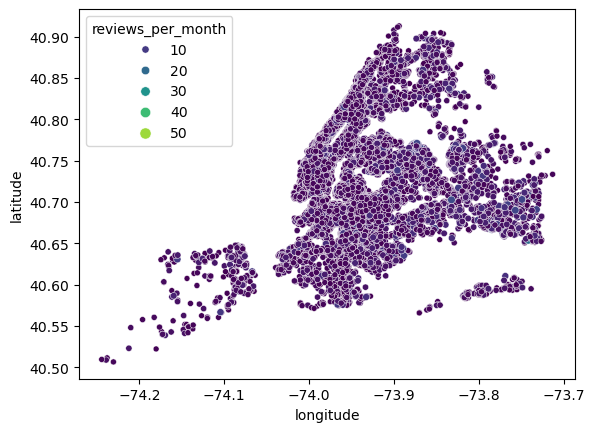

In [23]:
lat_long_plot = sns.scatterplot(y = drop_df['latitude'], 
                                x = drop_df['longitude'],  
                                data = drop_df,  
                                size = drop_df['reviews_per_month'],  
                                hue = drop_df['reviews_per_month'],  
                                palette = 'viridis') 
lat_long_plot.set_xlabel('longitude') 
lat_long_plot.set_ylabel('latitude') 

Here you can see a definite difference by neighborhood and reviews per month. It seems like a small change in latitude and longitutde can make a large difference, even if it's a bit harder to see on the unscaled plot (due to all the outliers).

In [24]:
X_train["last_review"].value_counts()
drop_df['year'] = pd.DatetimeIndex(drop_df['last_review']).year

/var/folders/y2/p5_k0x8s14s50xtftv8n3l440000gn/T/ipykernel_45603/3363478453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df['year'] = pd.DatetimeIndex(drop_df['last_review']).year


<Axes: xlabel='year', ylabel='reviews_per_month'>

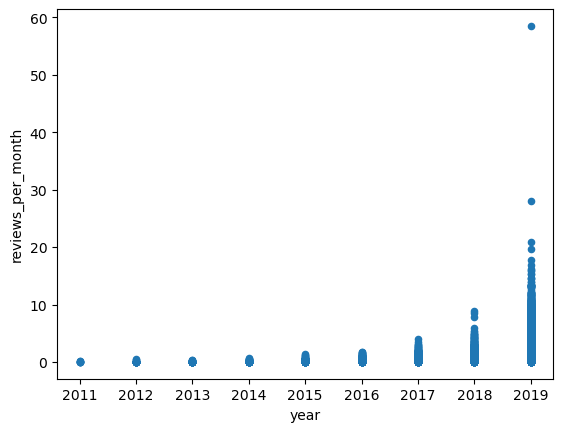

In [25]:
drop_df.plot(x="year", y="reviews_per_month", kind="scatter")

The graph above shows a major bias in our target value to a feature without a lot of real world value. I initially tried removing all properties that had a last review before 2019 but that lowed my test scores substantially. As such, I dropped the feature as it might constitute a data leak. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

Latitude and longtitude aren't linear data even if they're numerical, as such I think it best to change them into categorical discrete features through binning.

In [26]:
# Let's bin the latitude and longitude.

discretization_feats = ["latitude", "longitude"]

discretization_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                    KBinsDiscretizer(n_bins=20, encode="onehot"))

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

Here we're dropping the features discussed in the EPA step. Numeric features are those that will be logistically transformed, the name would probably be best as 'logistic features' but I didn't have time to refactor the whole document after setting up the new transformer. The non-logistic numerical feature "availability_365" is passed to standard feature where the pipeline will perform min-max scaling on this. I selected this scaling feature because I felt that the mostly flat distribution and the well defined bounds would suit it.

I am one hot encoding the discrete features as well as the categorical features. Room type I am treating as an ordinal feature because the scatter plot in the EPA phase confirmed my hunch that it's linearly related from the smallest room (shared room) to the largest (full apartment). 

Name will be count vectorized to 20 even though hyper parameter optimization suggested larger values to assist with interpretability. 

In [27]:
drop_feats = ["host_name", "last_review", "id", "host_id", "number_of_reviews"]
numeric_feats = ["price", "minimum_nights", "calculated_host_listings_count"]
standard_feats = ["availability_365"]
categorical_feats = ["neighbourhood_group", "neighbourhood"]
ordinal_feats = ["room_type"]
text_feats = ["name"]

In [28]:
def change_date_to_year(X):
    X = pd.DatetimeIndex(X).year;

def log_transform(X):
    return np.where(X > 0, np.log(X), 0)

In [29]:
#adapted from demo_05-06-preprocessing.ipynb

reshape_for_countvectorizer = FunctionTransformer(lambda X: X.squeeze(), validate=False)
text_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"), 
                          reshape_for_countvectorizer, 
                          CountVectorizer(max_features=20, stop_words="english"))

In [30]:
room_ordering = ["Shared room", "Private room", "Entire home/apt"]

#log transform the logarithmic numeric features, log transform doesn't look at any other values so we shouldn't have any data leakage!

X_train[numeric_feats] = X_train[numeric_feats].apply(log_transform)
X_test[numeric_feats] = X_test[numeric_feats].apply(log_transform)

#create the transformer pipelines

numeric_transformer = make_pipeline(SimpleImputer(strategy="median")) 
standard_transformer = make_pipeline(SimpleImputer(strategy="median"),                                      
                                      MinMaxScaler(feature_range=(0,365)))
ordinal_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                    OrdinalEncoder(categories=[room_ordering]))
categorical_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                    OneHotEncoder(sparse_output=True, handle_unknown="ignore"))


# Define the column transformer
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feats),
    (ordinal_transformer, ordinal_feats),
    (categorical_transformer, categorical_feats), 
    (discretization_transformer, discretization_feats),
    (text_transformer, text_feats),
    (standard_transformer, standard_feats),
    ("drop", drop_feats)    
)

/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/miniconda3/envs/cpsc330/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['price', 'minimum_nights',
                                  'calculated_host_listings_count']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Shared '
                                                                              'room',
                                                                              'Private '
                                                                              'room',
                                                                              'Entire '
                                                                              '...
                                                  FunctionTransformer(func=<function <lambda> at 0x14f15bc40>)),
                                                 ('countvectorizer',
                                                  CountVectorizer(max_features=20,
                                                                  stop_words='english'))]),
                                 ['name']),
                                ('pipeline-6',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmaxscaler',
                                                  MinMaxScaler(feature_range=(0,
                                                                              365)))]),
                                 ['availability_365']),
                                ('drop', 'drop',
                                 ['host_name', 'last_review', 'id', 'host_id',
                                  'number_of_reviews'])])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

The DummyRegressor with this dataset is unsurprisingly very bad.

In [32]:
model = DummyRegressor()
scores = cross_validate(model, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.002374,0.000427,-2.055798e-04,0.0
1,0.001557,0.000275,-6.196033e-05,0.0
2,0.001429,0.000248,-9.107902e-08,0.0
3,0.001334,0.000245,-2.852642e-06,0.0
4,0.001284,0.000246,-2.111910e-05,0.0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

Unfortunantly it seems like a linear model like Ridge is giving very poor results. I played around with the alpha value as I expected some issues with outliers but there doesn't seem to be a hyperparameter that gives a high test or train score, suggesting that the data would do better with a non-linear model.

In [33]:
ridge_pipe = make_pipeline(preprocessor, Ridge(alpha = 1000))

In [34]:
scores = cross_validate(ridge_pipe, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.127988,0.025751,0.154804,0.173394
1,0.107281,0.024710,0.167057,0.170804
2,0.106600,0.024849,0.179768,0.167123
3,0.106635,0.024662,0.162252,0.171734
4,0.105559,0.024509,0.170003,0.170031


In [35]:
ridge_pipe_100 = make_pipeline(preprocessor, Ridge(alpha = 100))

In [36]:
scores = cross_validate(ridge_pipe_100, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.114668,0.024951,0.163516,0.191462
1,0.111619,0.025059,0.176378,0.188427
2,0.109772,0.024628,0.194063,0.183409
3,0.116114,0.028093,0.176332,0.188418
4,0.110608,0.024273,0.183217,0.186501


In [37]:
ridge_pipe_50 = make_pipeline(preprocessor, Ridge(alpha = 50))

In [38]:
scores = cross_validate(ridge_pipe_100, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.115147,0.024992,0.163516,0.191462
1,0.109395,0.024951,0.176378,0.188427
2,0.125134,0.025887,0.194063,0.183409
3,0.111124,0.025003,0.176332,0.188418
4,0.114442,0.026502,0.183217,0.186501


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

It does look like non-linear models were an improvement! Even the basic DecisionTreeRegressor is doing significantly better than Ridge. The test scores are still quite low but clustering shows some moderate success, with both RandomForestRegressor and LGBMRegressor showing test scores of around .4. I think I'll be going forward with LBGMRegressor however, because it has a slightly higher average test score than RandomForestRegressor as well as a lower train score. This implies that RandomForestRegressor may be **overfitting**. Fit times are longer compared to a linear model, but the accuracy is well worth the trade off. It seems like DecisionTreeRegressor is **underfitting**, but playing around with max depth didn't produce a significant improvement in train score.

In [39]:
#code adapted from demo_12-ensembles.ipynb

pipe_dt = make_pipeline(preprocessor, DecisionTreeRegressor(max_depth=7, random_state=123))
scores = cross_validate(
    pipe_dt, X_train, y_train, return_train_score=True
)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.150955,0.025682,0.287112,0.375793
1,0.140766,0.024966,0.325960,0.370981
2,0.139657,0.024955,0.336640,0.364242
3,0.140271,0.024846,0.306266,0.366536
4,0.143107,0.024579,0.301631,0.366576


In [ ]:
pipe_rf = make_pipeline(
    preprocessor,
    RandomForestRegressor(
        n_jobs=-1,
        random_state=123,
    ),
)
scores = cross_validate(
    pipe_rf, X_train, y_train, return_train_score=True
)
pd.DataFrame(scores)

In [ ]:
pipe_lgb = make_pipeline(preprocessor, LGBMRegressor(random_state=123, learning_rate=0.1, n_estimators = 500))
scores = cross_validate(
    pipe_lgb, X_train, y_train, return_train_score=True
)
pd.DataFrame(scores)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

For whatever reason feature selection did show any improvement when added to my pipelines. I tried with both the RandomForestRegressor and LGBMRegressor with two different feature importance strategies and they both scored lower than without it. As such I do not plan on adding them to my pipelines. RFECV takes a very long time to run for me and was not helpful in the calculations, so we've commented it out but included it for completions sake.

In [ ]:

# rfe_pipe = make_pipeline(
#     preprocessor,
#     RFECV(Ridge(alpha = 31, max_iter=2000), cv=10),
#     RandomForestRegressor( n_estimators=100, n_jobs=-1, random_state=123),
# )

# result = pd.DataFrame(cross_validate(rfe_pipe, X_train, y_train, return_train_score=True))
# result

In [ ]:
lasso_pipe = make_pipeline(
    preprocessor,
    SelectFromModel(Lasso(alpha=0.1)),  # Lasso for feature selection
    LGBMRegressor(random_state=123, learning_rate=0.1, n_estimators = 500)  # LightGBM as the regressor
)
result = pd.DataFrame(cross_validate(lasso_pipe, X_train, y_train, return_train_score=True))
result

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

I had some luck with hyperparameter optimization. For all features I tried to optimize count vectorizer which showed that a higher feature count generally led to slightly higher test scores. I chose a smaller band for interperatibility however.

Ridge showed that most feature of alpha still result in smaller test scores than other models.

DecisionTreeRegressor shows some good improvement around a depth of seven, but still lost out to the clustering models. 



In [ ]:
param_grid = {
    "columntransformer__pipeline-5__countvectorizer__max_features": np.linspace(100, 2000, num=20).astype(int).tolist(),
    "ridge__alpha": 10.0 ** np.arange(-5, 5, 1)
}

print("Grid size: %d" % (np.prod(list(map(len, param_grid.values())))))
param_grid

In [ ]:
# Create a random search object
random_search = RandomizedSearchCV(ridge_pipe,                                    
                  param_distributions = param_grid, 
                  n_iter=100, 
                  n_jobs=-1, 
                  return_train_score=True)

# Carry out the search
random_search.fit(X_train, y_train)

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_columntransformer__pipeline-5__countvectorizer__max_features",
        "param_ridge__alpha",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

In [ ]:
param_grid = {
    "columntransformer__pipeline-5__countvectorizer__max_features": np.linspace(100, 2000, num=15).astype(int).tolist(),
    "decisiontreeregressor__max_depth": np.linspace(1, 10, num=5).astype(int).tolist()
}

print("Grid size: %d" % (np.prod(list(map(len, param_grid.values())))))
param_grid

In [ ]:
# Create a random search object
random_search = RandomizedSearchCV(pipe_dt,                                    
                  param_distributions = param_grid, 
                  n_iter=50, 
                  n_jobs=-1, 
                  return_train_score=True)

# Carry out the search
random_search.fit(X_train, y_train)

pd.DataFrame(random_search.cv_results_)[
    [
        "mean_test_score",
        "param_columntransformer__pipeline-5__countvectorizer__max_features",
        "param_decisiontreeregressor__max_depth",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T

In [ ]:
# adapted from code from ChatGPT

# Define parameter grid for LGBMRegressor
param_grid = {
    'lgbmregressor__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'lgbmregressor__max_depth': [3, 5, 7, 10, -1],
    'lgbmregressor__num_leaves': [15, 31, 63, 127],
}

random_search = RandomizedSearchCV(
    pipe_lgb, param_distributions=param_grid, n_iter=50, 
    cv=5, scoring='neg_mean_squared_error', random_state=123, n_jobs=-1, verbose=1
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best parameters found: ", best_params)
print("Best cross-validation score (MSE): ", -best_score)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

Feature importance was from the outset the most important part of the data analysis. This section as such showed some of the most interesting observation of the data. Unsurprisingly, price and minimum nights showed a strong affect on the data, with a high price having a negative affect on reviews per month and high minumum nights also having a negative affect. Surprisingly however, 365 availability has a very large affect! The anaylsis of the test data gives further insight into this affect and will be discussed more there.

In [ ]:
preprocessor.fit(X_train)

In [ ]:
ohe_columns = list(
    preprocessor.named_transformers_["pipeline-3"]
    .named_steps["onehotencoder"]
    .get_feature_names_out(categorical_feats)
)
discretization_feats_cols = list(
    preprocessor.named_transformers_["pipeline-4"]
    .named_steps["kbinsdiscretizer"]
    .get_feature_names_out(discretization_feats)
)
text_feats_cols = list(
    preprocessor.named_transformers_["pipeline-5"]
    .named_steps["countvectorizer"]
    .get_feature_names_out(text_feats)
)
feature_names = (
    numeric_feats + ordinal_feats + ohe_columns + discretization_feats_cols + text_feats_cols + standard_feats
)
# feature_names

In [ ]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train).toarray(), index=X_train.index, columns=feature_names
)
X_train_enc

In [ ]:
pipe_lgb.fit(X_train,y_train)
data = {
    "Feature": feature_names, 
    "Importance": pipe_lgb.named_steps["lgbmregressor"].feature_importances_,
}
#data


In [ ]:
# Create the DataFrame and sort by "Importance"
df = pd.DataFrame(data).sort_values(by="Importance", ascending=False)[:10]
df

In [ ]:
X_train_enc.columns = X_train_enc.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

model = LGBMRegressor(random_state=123)
model.fit(X_train_enc, y_train)
explainer = shap.TreeExplainer(model) # define the shap explainer 
train_shap_values = explainer(X_train_enc) # train shap values
shap.initjs()
ex1_idx = 60

In [ ]:
shap.plots.waterfall(train_shap_values[ex1_idx])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

Despite the low test scores in cross validation, the regression metrics actually seem to imply a reasonably accurate model! Looking at a few of the data points in a SHAP plot shows some interesting relationships however! It seems that the feature was rated so highly despite not showing a string predictive value in the scatter plot, was because a score of 0 has a very large negative affect on reviews per month. This is unsurprising but also suggests a general issue with the target value and how it favors properties currently open in a possible unhelpful way.  We didn't have the chance to go through all the regression metrics for the validation data, but given the number of data points, I think it's unlikely that the model has an issue with optimization bias and I generally trust the results.

In [ ]:
pipe_lgb.predict(X_test)


In [ ]:
data = {
    "Feature": feature_names, 
    "Importance": pipe_lgb.named_steps["lgbmregressor"].feature_importances_,
}
#data

In [ ]:
X_test_enc = pd.DataFrame(
    preprocessor.transform(X_test).toarray(), index=X_test.index, columns=feature_names
)
X_test_enc

In [ ]:
X_test_enc.columns = X_test_enc.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

model = LGBMRegressor(random_state=123, learning_rate=0.1, n_estimators = 500)
model.fit(X_test_enc, y_test)
explainer = shap.TreeExplainer(model) # define the shap explainer 
train_shap_values = explainer(X_test_enc) # train shap values
shap.initjs()

In [ ]:
plt.scatter(y_test, pipe_lgb.predict(X_test), alpha=0.3)
grid = np.linspace(y_train.min(), y_train.max(), 1000)
plt.plot(grid, grid, "--k")
plt.xlabel("true reviews per month")
plt.ylabel("predicted reviews per month");

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, pipe_lgb.predict(X_test)))

In [ ]:
mse = mean_squared_error(y_test, pipe_lgb.predict(X_test))

In [ ]:
test_shap_values = explainer(X_test_enc)

In [ ]:
ex1_idx = 20
ex2_idx = 50

In [ ]:
shap.force_plot(explainer.expected_value, test_shap_values.values[ex1_idx, :], X_test_enc.iloc[ex1_idx, :])

In [ ]:
ex2_idx = 50

In [ ]:
shap.force_plot(explainer.expected_value, test_shap_values.values[ex2_idx, :], X_test_enc.iloc[ex2_idx, :])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

Here is a table of our regression metrics. As you can see, the model had a pretty low error but the variance was still quite high matching the low validation scores explored above. The dataset was a challenging one to interpret with the target value having a strong recency bias that could have contributed to some of the low test scores. Reviews per month is a tough metric to measure popularity and the data itself could have been unhelpfully constructed.

I wish we had more time to mess with the data and remove some of these confounding factors. I felt like trimming the older years could contribute to a higher test score, but we didn't have much positive success with that. Doing further hyperparameter testing with LBGM could have also led to a better result, but grid and random search took a very long to process so we could only try so many variations. 

In conclusion, it seems that being open is very important to getting a a high monthly review count! More seriously, higher prices get lower monthly reviews and lower mininum limits also seem to get higher reviews. We'd have also liked to go further in to the specific affect of word choice in the title on the amount of reviews, but we didn't have an opportunity to go further into that exploration. 

The final test metric I'm using is RMSE at 1.389591.

In [ ]:
r2 = r2_score(y_test, pipe_lgb.predict(X_test))

In [ ]:


mape = mean_absolute_percentage_error(y_test, pipe_lgb.predict(X_test))

In [ ]:
results = pd.DataFrame({
    "Metric": ["Root Mean Squared Error", "Mean Squared Error", "R^2 Score", "Mean Absolute Percentage Error"],
    "Score": [rmse, mse, r2, mape]
})
results.T

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

It was very easy to spend a lot of time with this project. One of the most important things in machine learning seems to be to know when to call it quits and when to realize that a dataset just isn't going to provide the high accuracy you're looking for. A model is only as good as it's data after all. I did enjoy the preprocessing elements and tinkering with the data however, but for whatever reason some of the methods would take a very long time to run and force me to take a break while waiting for things to update. Machine learning definitely requires a lot of patience but think of problems holistically in a way that I really enjoy. I hope I have the opportunity to work on machine learning problems in the future, hopefully with a more robust data set!

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)